# Practica 2: Analisis de series de tiempo estacionarias

##Datasets escogidos:

* Global Traffic Accidents: Accidentes de trafico globales
* Pitstops: Registros de paradas en pits de la Formula 1 de 1990 hasta 2010
* VG Sales: Ventas de videojuegos a lo largo de la historia, por plataformas y demas

## Importado de librerias

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Conversion de los datasets a Series de Tiempo

## Carga de datasets

In [4]:
file_paths = {
    "vgsales": "vgsales.csv",
    "global_traffic_accidents": "global_traffic_accidents.csv",
    "pitstops": "pitstops.csv"
}

datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

## Transformacion de los datasets en series de tiempo, cambio de formato

In [5]:
vgsales = datasets["vgsales"].dropna(subset=["Year"])  # Eliminar valores nulos en el año
vgsales["Year"] = vgsales["Year"].astype(int)  # Convertir a enteros
vgsales_ts = vgsales.groupby("Year")["Global_Sales"].sum()
vgsales_ts.index = pd.to_datetime(vgsales_ts.index.astype(str), format="%Y")

global_traffic_accidents_ts = datasets["global_traffic_accidents"].groupby("Date")["Casualties"].sum()
global_traffic_accidents_ts.index = pd.to_datetime(global_traffic_accidents_ts.index)

pitstops = datasets["pitstops"].dropna(subset=["Year"])  # Eliminar valores nulos en el año
pitstops["Year"] = pitstops["Year"].astype(int)  # Convertir a enteros
pitstops_ts = pitstops.groupby("Year")["Stops"].sum()
pitstops_ts.index = pd.to_datetime(pitstops_ts.index.astype(str), format="%Y")

<ipython-input-5-c15023653953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgsales["Year"] = vgsales["Year"].astype(int)  # Convertir a enteros


## Graficas de las series de tiempo

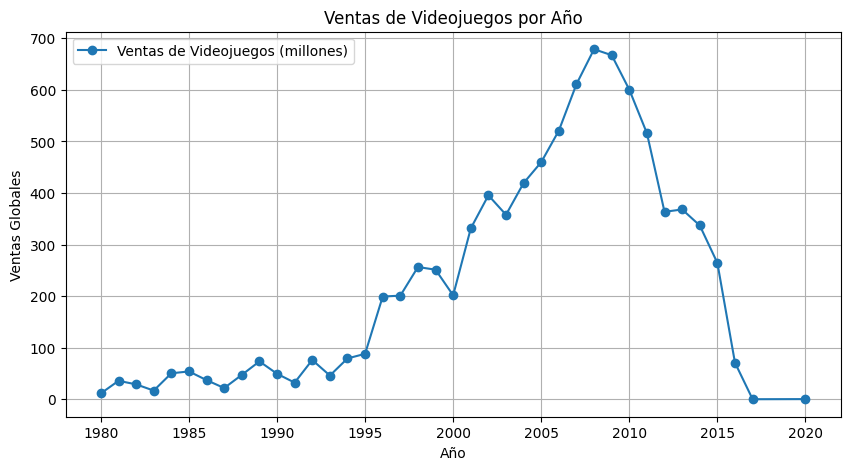

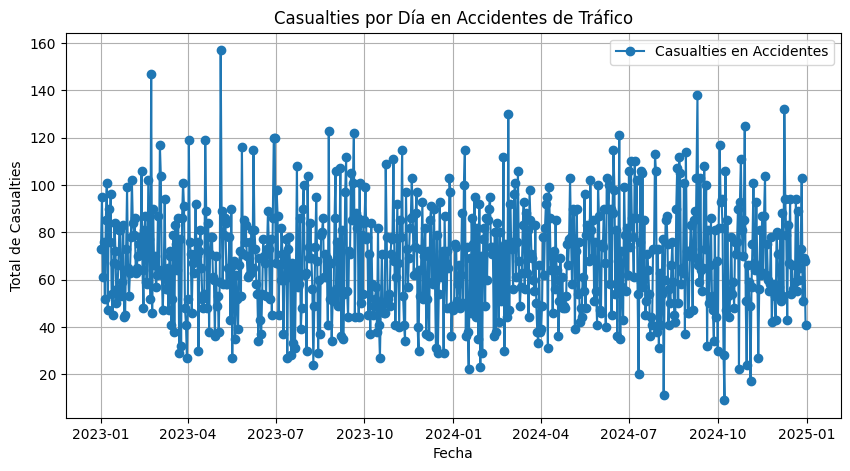

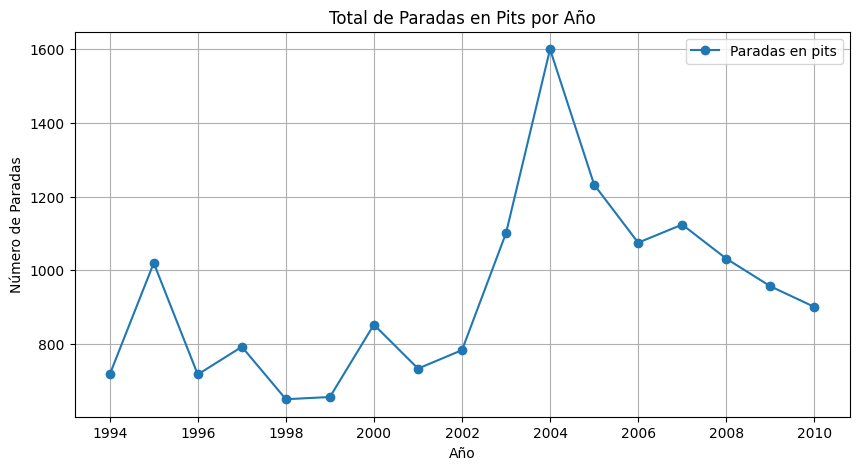

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(vgsales_ts, marker='o', label="Ventas de Videojuegos (millones)")
plt.xlabel("Año")
plt.ylabel("Ventas Globales")
plt.title("Ventas de Videojuegos por Año")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(global_traffic_accidents_ts, marker='o', label="Casualties en Accidentes")
plt.xlabel("Fecha")
plt.ylabel("Total de Casualties")
plt.title("Casualties por Día en Accidentes de Tráfico")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(pitstops_ts, marker='o', label="Paradas en pits")
plt.xlabel("Año")
plt.ylabel("Número de Paradas")
plt.title("Total de Paradas en Pits por Año")
plt.legend()
plt.grid()
plt.show()

# Aplicación de la prueba de Dickey-Fuller

Uso de la función "adfuller" de statsmodel para el calculo de la prueba de Dickey-Fuller

In [8]:
def adf_test(series, title):
    result = adfuller(series.dropna())
    print(f"Resultados de Dickey-Fuller para {title}:")
    print(f"Estadístico de prueba: {result[0]}")
    print(f"Valor p: {result[1]}")
    print(f"Valores críticos: {result[4]}")
    if result[1] <= 0.05:
        print("La serie es estacionaria.")
    else:
        print("La serie NO es estacionaria.")
    print("-" * 50)

Aplicación de la prueba para cada dataset

In [9]:
adf_test(vgsales_ts, "Ventas de Videojuegos")
adf_test(global_traffic_accidents_ts, "Accidentes de Tráfico")
adf_test(pitstops_ts, "Paradas en Pits")

Resultados de Dickey-Fuller para Ventas de Videojuegos:
Estadístico de prueba: -1.320253751807927
Valor p: 0.6198560149549842
Valores críticos: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
La serie NO es estacionaria.
--------------------------------------------------
Resultados de Dickey-Fuller para Accidentes de Tráfico:
Estadístico de prueba: -26.784995456167987
Valor p: 0.0
Valores críticos: {'1%': -3.4393396487377155, '5%': -2.865507363200066, '10%': -2.5688826684180897}
La serie es estacionaria.
--------------------------------------------------
Resultados de Dickey-Fuller para Paradas en Pits:
Estadístico de prueba: -2.0431189212717853
Valor p: 0.26799264572625237
Valores críticos: {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}
La serie NO es estacionaria.
--------------------------------------------------
